In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [3]:
subfolder_name = 'raw'
csv_file_name = 'dutch-news-articles.csv'
csv_file_path = os.path.join(os.getcwd(), subfolder_name, csv_file_name)

# Read the entire CSV file
df = pd.read_csv(csv_file_path)



# Inspect data

In [4]:
# Get the number of rows
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the shape of dataset
print(f'The CSV file contains {num_rows} rows.')
print(f'The CSV file contains {num_cols} columns.')

The CSV file contains 246457 rows.
The CSV file contains 5 columns.


In [5]:
# The first entry as example
df.iloc[:1, :]

,datetime,title,content,category,url
0,2010-01-01 00:49:00,Enige Litouwse kerncentrale dicht,De enige kerncentrale van Litouwen is oudjaars...,Buitenland,https://nos.nl/artikel/126231-enige-litouwse-k...


# Data cleaning

In [6]:

# Combine category "Cultuur & Media" and "Cultuur-En-Media" into one
df.loc[df['category'] == 'Cultuur-En-Media', 'category'] = 'Cultuur & Media'
# Combine category "Regionaal nieuws" and "Regio" into one
df.loc[df['category'] == 'Regio', 'category'] = 'Regionaal nieuws'


# Check the timeframe of the dataset

In [7]:
print(f'The earliest entry: {df.iloc[:, 0].min()}')
print(f'The latest entry: {df.iloc[:, 0].max()}')

The earliest entry: 2010-01-01 00:49:00
The latest entry: 2022-12-04 10:55:58


In [8]:
df.index = pd.to_datetime(df['datetime'])
df = df.drop('datetime', axis=1)

In [9]:
# Aggregate the data to monthly counts
df_monthly_counts = df.groupby(pd.Grouper(freq='M')).size().reset_index(name='count')
df_monthly_counts = df_monthly_counts.rename(columns={'datetime': 'date'})

In [10]:
# Reshape the data into a 10x12 matrix for the heat map
df_monthly_counts['year'] = df_monthly_counts['date'].dt.year
df_monthly_counts['month'] = df_monthly_counts['date'].dt.month

counts_matrix = df_monthly_counts.pivot(index='year', columns='month', values='count')

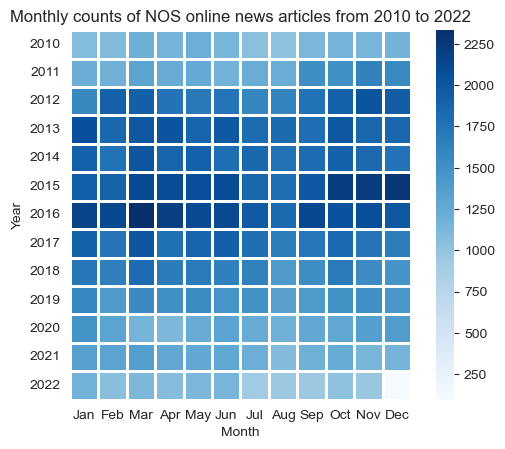

In [16]:
sns.set_style("whitegrid")

fig, ax = plt.subplots()
ax = sns.heatmap(
    counts_matrix, cmap='Blues',
    square=True, linewidths=1
)

plt.title('Monthly counts of NOS online news articles from 2010 to 2022')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(np.arange(0, 12)+0.5, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#plt.tight_layout()

plt.show()

In [17]:
# Save plot
out_subfolder_name = 'fig'
out_file_name = 'word_freq_heatmap.png'
out_file_path = os.path.join(os.getcwd(), out_subfolder_name, out_file_name)

fig.savefig(out_file_path)

# Check the category

In [13]:
plot_df = pd.DataFrame(df['category'].value_counts()).reset_index()
plot_df = plot_df.rename(columns={'index': 'category', 'category': 'count'})

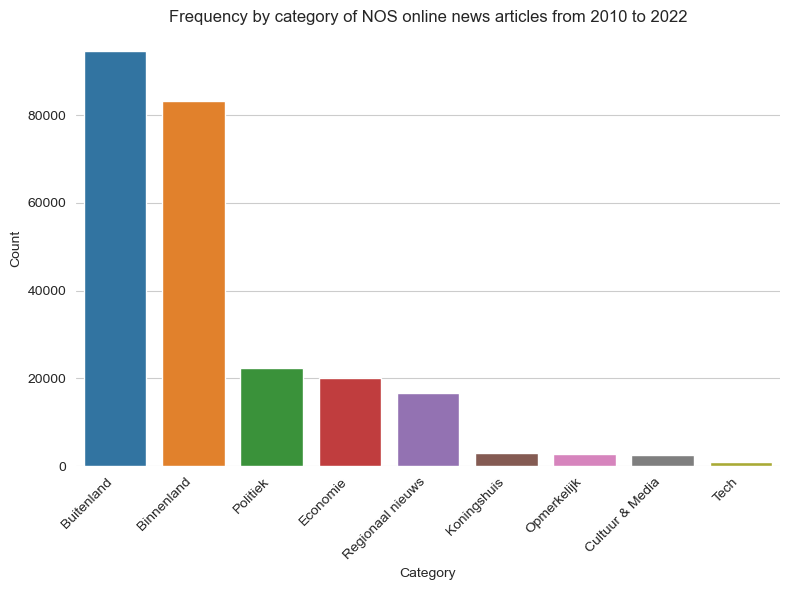

In [14]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(
    data=plot_df, x='category', y='count'
)

# Offset the tick labels
locs, labels = plt.xticks()
offset = 0
plt.xticks(locs + offset, labels, rotation=45, horizontalalignment='right')

sns.despine(left=True, bottom=True)

plt.title('Frequency by category of NOS online news articles from 2010 to 2022')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

In [15]:
# Save plot
out_subfolder_name = 'fig'
out_file_name = 'word_freq_categories.png'
out_file_path = os.path.join(os.getcwd(), out_subfolder_name, out_file_name)

fig.savefig(out_file_path)